### Creating a graph using networkx

In [ ]:
pip install scipy==1.8.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.6/41.6 MB 20.3 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.10.1
    Uninstalling scipy-1.10.1:
      Successfully uninstalled scipy-1.10.1


In [ ]:
pip install networkx==2.8.7

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 24.6 MB/s eta 0:00:00
  Attempting uninstall: networkx
    Found existing installation: networkx 3.0
    Uninstalling networkx-3.0:
      Successfully uninstalled networkx-3.0


In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import random
import operator
import math
import heapq
import itertools

In [ ]:
df = pd.read_csv('star-wars-network-edges.csv')
df1 = df[['source', 'target','weight']]

In [ ]:
G = nx.from_pandas_edgelist(df1,'source','target')

In [ ]:
G_orig = G.copy()
GBet = G.copy()

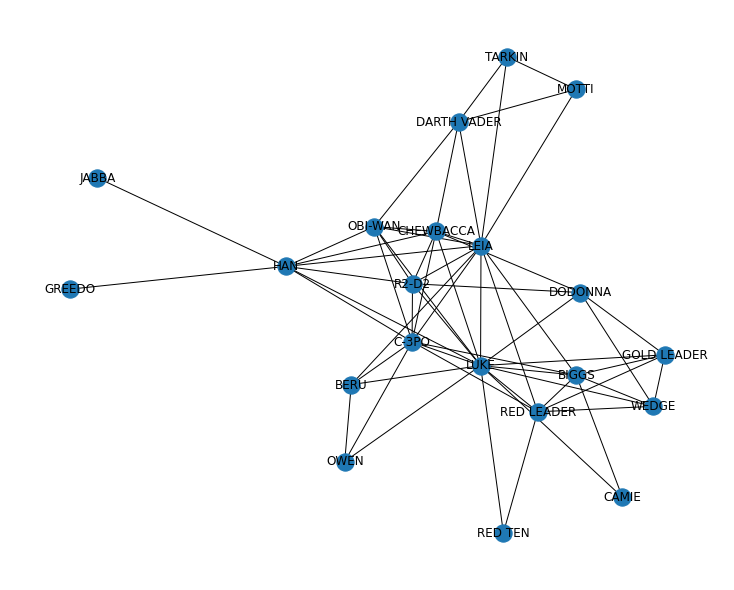

In [ ]:
figure(figsize=(10, 8))
nx.draw(G,with_labels=True)

In [ ]:
nc = G.number_of_nodes()
print("Number of nodes: ",nc)
ne = G.number_of_edges()
print("Number of edges: ",ne)

Number of nodes:  21
Number of edges:  60


### Adjacency matrix of the graph

In [ ]:
A = nx.adjacency_matrix(G).todense()

print(A)

[[0 1 1 1 1 1 1 0 0 0 1 1 1 0 0 0 0 0 0 1 0]
 [1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 1 0 1 1 1 1 1 0 1 1 1 1 0 0 0 0 1 1 1 1]
 [1 1 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 1 1 1 0 1 1 0 1 0 1 1 0 1 1 0 0 0 0 1 0]
 [1 1 1 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0]
 [1 1 1 1 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0]
 [0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0]
 [1 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0]
 [0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 1 0]
 [1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]]


<ipython-input-10-b8d2a4bd5802>:1: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G).todense()


In [ ]:
adj_mat = []
for i in A:
    adj_mat.append(list(i.A[0]))

for i in range(nc):
  for j in range(nc):
    if adj_mat[i][j] > 0:
      adj_mat[i][j] = 1

In [ ]:
for i in range(nc):
  print(adj_mat[i])

[0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0]
[1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1]
[1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0]
[1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0]
[1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0]
[0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0]
[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0]
[1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 

### Local graph sparsification

In [ ]:
def create_empty_copy(G, with_data=True):
    H = G.__class__()
    H.add_nodes_from(G.nodes(data=with_data))
    if with_data:
        H.graph.update(G.graph)
    return H

In [ ]:
sparse_graph = create_empty_copy(G,with_data=True)

In [ ]:
degree = {}
for node in G.nodes:
  degree[node] = G.degree[node]

In [ ]:
adj_list = {}
for node in G.nodes:
  adj_list[node] = []
  for n in G.neighbors(node):
    adj_list[node].append(n)

In [ ]:
print(adj_list)

{'C-3PO': ['R2-D2', 'CHEWBACCA', 'BERU', 'LUKE', 'OWEN', 'LEIA', 'OBI-WAN', 'HAN', 'BIGGS', 'RED LEADER'], 'R2-D2': ['C-3PO', 'LUKE', 'OBI-WAN', 'LEIA', 'HAN', 'CHEWBACCA', 'DODONNA'], 'LUKE': ['R2-D2', 'CHEWBACCA', 'CAMIE', 'BIGGS', 'BERU', 'OWEN', 'C-3PO', 'LEIA', 'OBI-WAN', 'HAN', 'DODONNA', 'GOLD LEADER', 'WEDGE', 'RED LEADER', 'RED TEN'], 'OBI-WAN': ['R2-D2', 'CHEWBACCA', 'LUKE', 'C-3PO', 'LEIA', 'HAN', 'DARTH VADER'], 'LEIA': ['R2-D2', 'CHEWBACCA', 'DARTH VADER', 'C-3PO', 'LUKE', 'BERU', 'OBI-WAN', 'MOTTI', 'TARKIN', 'HAN', 'BIGGS', 'RED LEADER'], 'HAN': ['R2-D2', 'CHEWBACCA', 'OBI-WAN', 'LUKE', 'GREEDO', 'JABBA', 'C-3PO', 'LEIA'], 'CHEWBACCA': ['R2-D2', 'OBI-WAN', 'C-3PO', 'LUKE', 'HAN', 'LEIA', 'DARTH VADER', 'DODONNA'], 'DODONNA': ['R2-D2', 'CHEWBACCA', 'GOLD LEADER', 'WEDGE', 'LUKE'], 'DARTH VADER': ['CHEWBACCA', 'LEIA', 'MOTTI', 'TARKIN', 'OBI-WAN'], 'CAMIE': ['LUKE', 'BIGGS'], 'BIGGS': ['CAMIE', 'LUKE', 'LEIA', 'RED LEADER', 'C-3PO', 'WEDGE', 'GOLD LEADER'], 'BERU': ['LUKE'

In [ ]:
def similarity(node1,node2):
 adj1 = adj_list[node1]
 adj2 = adj_list[node2]
 sim_val = len(set(adj1) & set(adj2))/len(set(adj1) | set(adj2))
 return sim_val

In [ ]:
# local sparsification algorithm
# local sparsification exponent e = 0.75
e = 0.75
for node in G.nodes:
  d = degree[node]
  adj = adj_list[node]
  i = 1
  sim = {}
  thresh = math.floor(pow(d,e))

  for i in adj:
    sim[i] = similarity(node,i)
  sorted_sim = dict( sorted(sim.items(), key=operator.itemgetter(1),reverse=True))
  sorted_sim = dict(itertools.islice(sorted_sim.items(), thresh))
  for i in sorted_sim.keys():
    if not sparse_graph.has_edge(node,i):
      sparse_graph.add_edge(node,i)
       

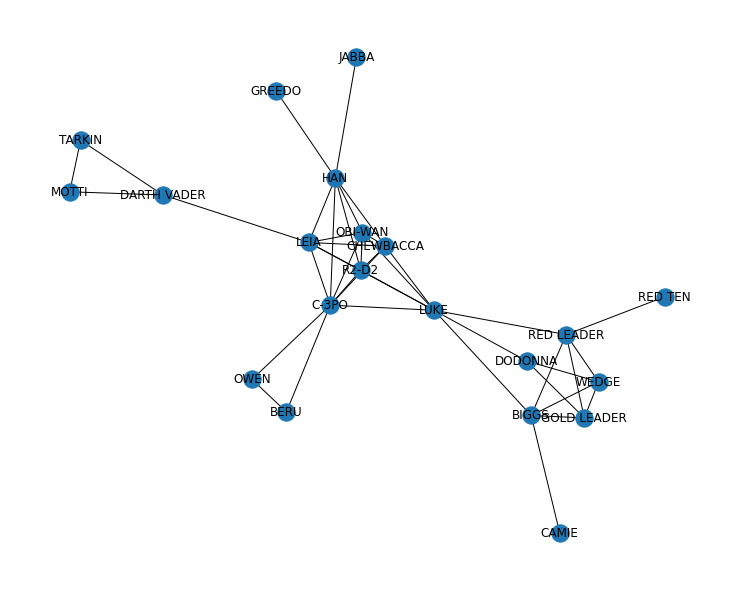

In [ ]:
figure(figsize=(10, 8))
nx.draw(sparse_graph,with_labels = True)

In [ ]:
nsc = sparse_graph.number_of_nodes()
print("Number of nodes: ",nsc)
nse = sparse_graph.number_of_edges()
print("Number of edges: ",nse)

Number of nodes:  21
Number of edges:  42


### Find the average degree of the graph

In [ ]:
avg_degree = 0
sum_of_degree = 0

if nc < 10000:
  for i in range(nc):
    temp_sum = 0
    for j in range(nc):
      temp_sum += adj_mat[i][j]
    sum_of_degree += temp_sum
  
else:
  k = 10000
  sampled_nodes = random.sample(G.nodes, k)
  sampled_graph = G.subgraph(sampled_nodes)
  for node in sampled_graph.nodes:
    sum_of_degree += sampled_graph.degree[node]

avg_degree = sum_of_degree//nc
print(avg_degree)

5


### Find the connected components in the sparsified graph

In [ ]:
# identify the edges with degree higher than average degree and divide the graph into components based on those edges
adj_slist = {}
for node in sparse_graph.nodes:
  adj_slist[node] = []
  for n in sparse_graph.neighbors(node):
    adj_slist[node].append(n)

In [ ]:
hc_nodes_dict = {}
hc_nodes = []
for node in sparse_graph:
  if sparse_graph.degree[node] > avg_degree:
    hc_nodes_dict[node] = sparse_graph.degree[node]
hc_nodes_dict = dict( sorted(hc_nodes_dict.items(), key=operator.itemgetter(1),reverse=True))
for key in hc_nodes_dict.keys():
  hc_nodes.append(key)
print(hc_nodes)


['C-3PO', 'LUKE', 'LEIA', 'HAN', 'R2-D2', 'OBI-WAN', 'CHEWBACCA']


In [ ]:
nodes_left = list(sparse_graph.nodes)
for i in hc_nodes:
  if i in nodes_left:
    nodes_left.remove(i)
print(nodes_left)

['DODONNA', 'DARTH VADER', 'CAMIE', 'BIGGS', 'BERU', 'OWEN', 'MOTTI', 'TARKIN', 'GREEDO', 'JABBA', 'GOLD LEADER', 'WEDGE', 'RED LEADER', 'RED TEN']


In [ ]:

components = []

for node in hc_nodes:
  component = []
  component.append(node) 
  components.append(component)

In [ ]:
print(nodes_left)

['DODONNA', 'DARTH VADER', 'CAMIE', 'BIGGS', 'BERU', 'OWEN', 'MOTTI', 'TARKIN', 'GREEDO', 'JABBA', 'GOLD LEADER', 'WEDGE', 'RED LEADER', 'RED TEN']


In [ ]:
visited = {}
for node in nodes_left:
  visited[node] = False
for node in hc_nodes:
  visited[node] = True
for component in components:
  for i in component:
    for j in adj_slist[i]:
      if not visited[j]:
        component.append(j)
        nodes_left.remove(j)
        visited[j] = True

In [ ]:
print(components)

[['C-3PO', 'BERU', 'OWEN'], ['LUKE', 'BIGGS', 'RED LEADER', 'DODONNA', 'CAMIE', 'WEDGE', 'GOLD LEADER', 'RED TEN'], ['LEIA', 'DARTH VADER', 'MOTTI', 'TARKIN'], ['HAN', 'GREEDO', 'JABBA'], ['R2-D2'], ['OBI-WAN'], ['CHEWBACCA']]


In [ ]:
subgraphs = []
for component in components:
  temp = nx.Graph()
  temp = sparse_graph.subgraph(component)
  subgraphs.append(temp)

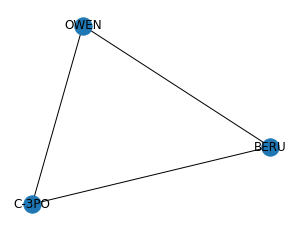

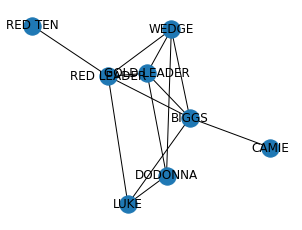

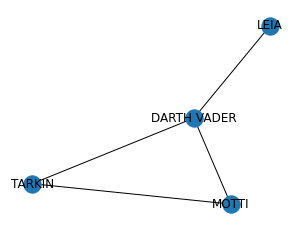

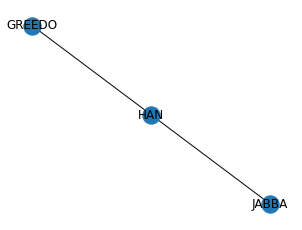

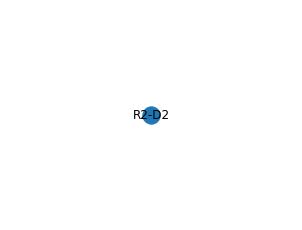

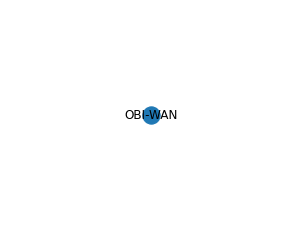

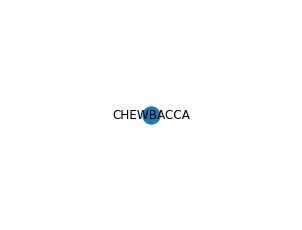

In [ ]:
for graph in subgraphs:
  figure(figsize=(4, 3))
  nx.draw(graph,with_labels = True)


### Construct a super graph

In [ ]:
all_edges = list(sparse_graph.edges)

In [ ]:
print(len(all_edges))

42


In [ ]:
sg_edges = []
for graph in subgraphs:
  for edge in graph.edges:
    sg_edges.append(edge)

In [ ]:
print(len(sg_edges))

22


In [ ]:
map_to_component = {}
for node in hc_nodes:
  for component in components:
    if node in component:
      map_to_component[node] = component
print(map_to_component)

{'C-3PO': ['C-3PO', 'BERU', 'OWEN'], 'LUKE': ['LUKE', 'BIGGS', 'RED LEADER', 'DODONNA', 'CAMIE', 'WEDGE', 'GOLD LEADER', 'RED TEN'], 'LEIA': ['LEIA', 'DARTH VADER', 'MOTTI', 'TARKIN'], 'HAN': ['HAN', 'GREEDO', 'JABBA'], 'R2-D2': ['R2-D2'], 'OBI-WAN': ['OBI-WAN'], 'CHEWBACCA': ['CHEWBACCA']}


In [ ]:
comp_head = {}
for item in map_to_component:
  nodes = []
  nodes = map_to_component[item]
  # print(item)
  for node in nodes:
    comp_head[node] = item
print(comp_head)

{'C-3PO': 'C-3PO', 'BERU': 'C-3PO', 'OWEN': 'C-3PO', 'LUKE': 'LUKE', 'BIGGS': 'LUKE', 'RED LEADER': 'LUKE', 'DODONNA': 'LUKE', 'CAMIE': 'LUKE', 'WEDGE': 'LUKE', 'GOLD LEADER': 'LUKE', 'RED TEN': 'LUKE', 'LEIA': 'LEIA', 'DARTH VADER': 'LEIA', 'MOTTI': 'LEIA', 'TARKIN': 'LEIA', 'HAN': 'HAN', 'GREEDO': 'HAN', 'JABBA': 'HAN', 'R2-D2': 'R2-D2', 'OBI-WAN': 'OBI-WAN', 'CHEWBACCA': 'CHEWBACCA'}


In [ ]:
super_graph = nx.Graph()
super_graph.add_nodes_from(hc_nodes)
for node in super_graph.nodes:
  comp_list = map_to_component[node]
  for i in comp_list:
    for j in adj_list[i]:
      if comp_head[j] != comp_head[i] and not super_graph.has_edge(comp_head[i],comp_head[j]):
        super_graph.add_edge(comp_head[i],comp_head[j])


In [ ]:
super_graph = nx.Graph()
super_graph.add_nodes_from(hc_nodes)
for node in super_graph.nodes:
  comp_list = map_to_component[node]
  temp = []
  temp.extend(hc_nodes)
  temp.remove(node)
  for i in comp_list:
    for j in adj_list[i] :
      if j in temp and sparse_graph.has_edge(node,j):
        super_graph.add_edge(node,j)
print(len(super_graph.edges))

20


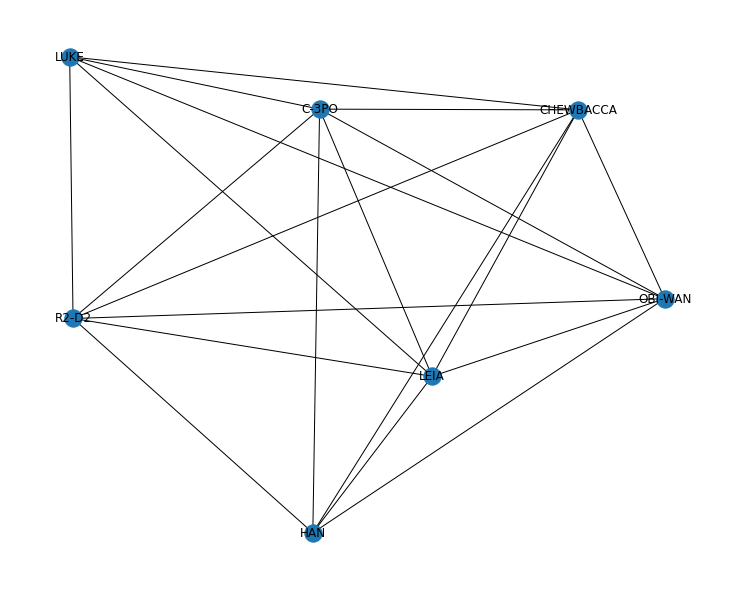

In [ ]:
figure(figsize=(10, 8))
nx.draw(super_graph,with_labels = True)

In [ ]:
print(len(super_graph.edges))

20


In [ ]:
import warnings
from collections import deque
from heapq import heappop, heappush
from itertools import count

from networkx.algorithms.shortest_paths.weighted import _weight_function
from networkx.utils import py_random_state
from networkx.utils.decorators import not_implemented_for


In [ ]:
# helper functions

def _single_source_shortest_path_basic(G, s):
    S = []
    P = {}
    for v in G:
        P[v] = []
    sigma = dict.fromkeys(G, 0.0)  # sigma[v]=0 for v in G
    D = {}
    sigma[s] = 1.0
    D[s] = 0
    Q = deque([s])
    while Q:  # use BFS to find shortest paths
        v = Q.popleft()
        S.append(v)
        Dv = D[v]
        sigmav = sigma[v]
        for w in G[v]:
            if w not in D:
                Q.append(w)
                D[w] = Dv + 1
            if D[w] == Dv + 1:  # this is a shortest path, count paths
                sigma[w] += sigmav
                P[w].append(v)  # predecessors
    return S, P, sigma, D


def _single_source_dijkstra_path_basic(G, s, weight):
    weight = _weight_function(G, weight)
    # modified from Eppstein
    S = []
    P = {}
    for v in G:
        P[v] = []
    sigma = dict.fromkeys(G, 0.0)  # sigma[v]=0 for v in G
    D = {}
    sigma[s] = 1.0
    push = heappush
    pop = heappop
    seen = {s: 0}
    c = count()
    Q = []  # use Q as heap with (distance,node id) tuples
    push(Q, (0, next(c), s, s))
    while Q:
        (dist, _, pred, v) = pop(Q)
        if v in D:
            continue  # already searched this node.
        sigma[v] += sigma[pred]  # count paths
        S.append(v)
        D[v] = dist
        for w, edgedata in G[v].items():
            vw_dist = dist + weight(v, w, edgedata)
            if w not in D and (w not in seen or vw_dist < seen[w]):
                seen[w] = vw_dist
                push(Q, (vw_dist, next(c), v, w))
                sigma[w] = 0.0
                P[w] = [v]
            elif vw_dist == seen[w]:  # handle equal paths
                sigma[w] += sigma[v]
                P[w].append(v)
    return S, P, sigma, D


def _accumulate_basic(betweenness, S, P, sigma, s):
    delta = dict.fromkeys(S, 0)
    while S:
        w = S.pop()
        coeff = (1 + delta[w]) / sigma[w]
        for v in P[w]:
            delta[v] += sigma[v] * coeff
        if w != s:
            betweenness[w] += delta[w]
    return betweenness, delta


def _accumulate_endpoints(betweenness, S, P, sigma, s):
    betweenness[s] += len(S) - 1
    delta = dict.fromkeys(S, 0)
    while S:
        w = S.pop()
        coeff = (1 + delta[w]) / sigma[w]
        for v in P[w]:
            delta[v] += sigma[v] * coeff
        if w != s:
            betweenness[w] += delta[w] + 1
    return betweenness, delta


def _accumulate_edges(betweenness, S, P, sigma, s):
    delta = dict.fromkeys(S, 0)
    while S:
        w = S.pop()
        coeff = (1 + delta[w]) / sigma[w]
        for v in P[w]:
            c = sigma[v] * coeff
            if (v, w) not in betweenness:
                betweenness[(w, v)] += c
            else:
                betweenness[(v, w)] += c
            delta[v] += c
        if w != s:
            betweenness[w] += delta[w]
    return betweenness


def _rescale(betweenness, n, normalized, directed=False, k=None, endpoints=False):
    if normalized:
        if endpoints:
            if n < 2:
                scale = None  # no normalization
            else:
                # Scale factor should include endpoint nodes
                scale = 1 / (n * (n - 1))
        elif n <= 2:
            scale = None  # no normalization b=0 for all nodes
        else:
            scale = 1 / ((n - 1) * (n - 2))
    else:  # rescale by 2 for undirected graphs
        if not directed:
            scale = 0.5
        else:
            scale = None
    if scale is not None:
        if k is not None:
            scale = scale * n / k
        for v in betweenness:
            betweenness[v] *= scale
    return betweenness


def _rescale_e(betweenness, n, normalized, directed=False, k=None):
    if normalized:
        if n <= 1:
            scale = None  # no normalization b=0 for all nodes
        else:
            scale = 1 / (n * (n - 1))
    else:  # rescale by 2 for undirected graphs
        if not directed:
            scale = 0.5
        else:
            scale = None
    if scale is not None:
        if k is not None:
            scale = scale * n / k
        for v in betweenness:
            betweenness[v] *= scale
    return betweenness


@not_implemented_for("graph")
def _add_edge_keys(G, betweenness, weight=None):
    
    _weight = _weight_function(G, weight)

    edge_bc = dict.fromkeys(G.edges, 0.0)
    for u, v in betweenness:
        d = G[u][v]
        wt = _weight(u, v, d)
        keys = [k for k in d if _weight(u, v, {k: d[k]}) == wt]
        bc = betweenness[(u, v)] / len(keys)
        for k in keys:
            edge_bc[(u, v, k)] = bc

    return edge_bc

In [ ]:
@py_random_state(4)
def edge_betweenness_centrality(G, k=None, normalized=True, weight=None, seed=None):
    
    betweenness = dict.fromkeys(G, 0.0)  # b[v]=0 for v in G
    # b[e]=0 for e in G.edges()
    betweenness.update(dict.fromkeys(G.edges(), 0.0))
    if k is None:
        nodes = G
    else:
        nodes = seed.sample(G.nodes(), k)
    for s in nodes:
        # single source shortest paths
        if weight is None:  # use BFS
            S, P, sigma, _ = _single_source_shortest_path_basic(G, s)
        else:  
            S, P, sigma, _ = _single_source_dijkstra_path_basic(G, s, weight)
        # accumulation
        betweenness = _accumulate_edges(betweenness, S, P, sigma, s)
    # rescaling
    for n in G:  # remove nodes to only return edges
        del betweenness[n]
    betweenness = _rescale_e(
        betweenness, len(G), normalized=normalized, directed=G.is_directed()
    )
    if G.is_multigraph():
        betweenness = _add_edge_keys(G, betweenness, weight=weight)
    return betweenness


In [ ]:
spg_edge_bc = edge_betweenness_centrality(super_graph)

In [ ]:
print(spg_edge_bc)

{('C-3PO', 'R2-D2'): 0.047619047619047616, ('C-3PO', 'CHEWBACCA'): 0.047619047619047616, ('C-3PO', 'LUKE'): 0.05714285714285715, ('C-3PO', 'LEIA'): 0.047619047619047616, ('C-3PO', 'OBI-WAN'): 0.047619047619047616, ('C-3PO', 'HAN'): 0.057142857142857134, ('LUKE', 'R2-D2'): 0.057142857142857134, ('LUKE', 'CHEWBACCA'): 0.057142857142857134, ('LUKE', 'LEIA'): 0.05714285714285715, ('LUKE', 'OBI-WAN'): 0.057142857142857134, ('LEIA', 'R2-D2'): 0.047619047619047616, ('LEIA', 'CHEWBACCA'): 0.047619047619047616, ('LEIA', 'OBI-WAN'): 0.047619047619047616, ('LEIA', 'HAN'): 0.057142857142857134, ('HAN', 'R2-D2'): 0.057142857142857134, ('HAN', 'CHEWBACCA'): 0.057142857142857134, ('HAN', 'OBI-WAN'): 0.057142857142857134, ('R2-D2', 'OBI-WAN'): 0.047619047619047616, ('R2-D2', 'CHEWBACCA'): 0.047619047619047616, ('OBI-WAN', 'CHEWBACCA'): 0.047619047619047616}


### Scale the edge betweenness centrality using a heuristic based on number of vertices in connected components

In [ ]:
map_to_component = {}
for node in hc_nodes:
  for component in components:
    if node in component:
      map_to_component[node] = component
print(map_to_component)

{'C-3PO': ['C-3PO', 'BERU', 'OWEN'], 'LUKE': ['LUKE', 'BIGGS', 'RED LEADER', 'DODONNA', 'CAMIE', 'WEDGE', 'GOLD LEADER', 'RED TEN'], 'LEIA': ['LEIA', 'DARTH VADER', 'MOTTI', 'TARKIN'], 'HAN': ['HAN', 'GREEDO', 'JABBA'], 'R2-D2': ['R2-D2'], 'OBI-WAN': ['OBI-WAN'], 'CHEWBACCA': ['CHEWBACCA']}


In [ ]:
for edge in spg_edge_bc:
  spg_edge_bc[edge] = len(map_to_component[edge[0]]) * len(map_to_component[edge[1]]) * spg_edge_bc[edge]

In [ ]:
print(spg_edge_bc)

{('C-3PO', 'R2-D2'): 0.14285714285714285, ('C-3PO', 'CHEWBACCA'): 0.14285714285714285, ('C-3PO', 'LUKE'): 1.3714285714285714, ('C-3PO', 'LEIA'): 0.5714285714285714, ('C-3PO', 'OBI-WAN'): 0.14285714285714285, ('C-3PO', 'HAN'): 0.5142857142857142, ('LUKE', 'R2-D2'): 0.4571428571428571, ('LUKE', 'CHEWBACCA'): 0.4571428571428571, ('LUKE', 'LEIA'): 1.8285714285714287, ('LUKE', 'OBI-WAN'): 0.4571428571428571, ('LEIA', 'R2-D2'): 0.19047619047619047, ('LEIA', 'CHEWBACCA'): 0.19047619047619047, ('LEIA', 'OBI-WAN'): 0.19047619047619047, ('LEIA', 'HAN'): 0.6857142857142856, ('HAN', 'R2-D2'): 0.1714285714285714, ('HAN', 'CHEWBACCA'): 0.1714285714285714, ('HAN', 'OBI-WAN'): 0.1714285714285714, ('R2-D2', 'OBI-WAN'): 0.047619047619047616, ('R2-D2', 'CHEWBACCA'): 0.047619047619047616, ('OBI-WAN', 'CHEWBACCA'): 0.047619047619047616}


In [ ]:
print(len(spg_edge_bc))

20


In [ ]:
# Budget ofedges to be removed
k = 25

In [ ]:
if k < len(spg_edge_bc):
  spg_edge_bc = dict( sorted(spg_edge_bc.items(), key=operator.itemgetter(1),reverse=True))
  spg_edge_bc = dict(itertools.islice(spg_edge_bc.items(), k))

### Reduction of budget of edges to be removed

In [ ]:

# Budget reduced after removing edges from super graph

k = k - len(spg_edge_bc)

if k < 0:
  k = 0

print("Budget left :", k)

Budget left : 5


### Split the budget between the components

In [ ]:
comp_budget = {}
for graph in subgraphs:
  comp_budget[graph] = 0.5 * len(graph.nodes) + 0.5 * len(graph.edges)
sum = 0

for ind in comp_budget.values():
  sum += ind

result = {key: round(value * k / sum) for key, value in comp_budget.items()}  

i = 1
for j in result.values():
  print(i,"th component budget : ",j)
  i = i + 1

1 th component budget :  1
2 th component budget :  2
3 th component budget :  1
4 th component budget :  1
5 th component budget :  0
6 th component budget :  0
7 th component budget :  0


### Find the edges betweenness centrality for each component using multithreading

In [ ]:
thread_count = len(subgraphs)
print(thread_count)

7


In [ ]:
import datetime
import time
import threading

class add_to_dict(threading.Thread):

    def __init__(self, lock, graph, kn, edge_list):
        threading.Thread.__init__(self)
        self.totalAdded = 0
        self.edge_list = edge_list
        self.lock = lock
        self.graph = graph
        self.kn = kn

    def run(self):        
            self.lock.acquire()
            if self.kn > 0:
              edge_bc = edge_betweenness_centrality(graph)
              sorted_edge_bc = dict( sorted(edge_bc.items(), key=operator.itemgetter(1),reverse=True))
              sorted_edge_bc2 = dict(itertools.islice(sorted_edge_bc.items(), self.kn))
              edge_list.update(sorted_edge_bc2)
            self.totalAdded += 1
            self.lock.release()                    


if __name__=="__main__":
    lock=threading.Lock()
    edge_list={}

    threads = [None] * thread_count
    
    i = 0
    for graph in subgraphs:
      threads[i] = add_to_dict(lock,graph,result[graph],edge_list)
      threads[i].start()
      i += 1

    for j in range(thread_count):
      threads[j].join()
    for item in edge_list.items():
      print(item)

(('C-3PO', 'BERU'), 0.3333333333333333)
(('RED LEADER', 'RED TEN'), 0.25)
(('BIGGS', 'CAMIE'), 0.25)
(('DARTH VADER', 'LEIA'), 0.5)
(('HAN', 'GREEDO'), 0.6666666666666666)


In [ ]:
edge_list.update(spg_edge_bc)

In [ ]:
print(len(edge_list))

25


In [ ]:
edge_list

{('C-3PO', 'BERU'): 0.3333333333333333,
 ('RED LEADER', 'RED TEN'): 0.25,
 ('BIGGS', 'CAMIE'): 0.25,
 ('DARTH VADER', 'LEIA'): 0.5,
 ('HAN', 'GREEDO'): 0.6666666666666666,
 ('C-3PO', 'R2-D2'): 0.14285714285714285,
 ('C-3PO', 'CHEWBACCA'): 0.14285714285714285,
 ('C-3PO', 'LUKE'): 1.3714285714285714,
 ('C-3PO', 'LEIA'): 0.5714285714285714,
 ('C-3PO', 'OBI-WAN'): 0.14285714285714285,
 ('C-3PO', 'HAN'): 0.5142857142857142,
 ('LUKE', 'R2-D2'): 0.4571428571428571,
 ('LUKE', 'CHEWBACCA'): 0.4571428571428571,
 ('LUKE', 'LEIA'): 1.8285714285714287,
 ('LUKE', 'OBI-WAN'): 0.4571428571428571,
 ('LEIA', 'R2-D2'): 0.19047619047619047,
 ('LEIA', 'CHEWBACCA'): 0.19047619047619047,
 ('LEIA', 'OBI-WAN'): 0.19047619047619047,
 ('LEIA', 'HAN'): 0.6857142857142856,
 ('HAN', 'R2-D2'): 0.1714285714285714,
 ('HAN', 'CHEWBACCA'): 0.1714285714285714,
 ('HAN', 'OBI-WAN'): 0.1714285714285714,
 ('R2-D2', 'OBI-WAN'): 0.047619047619047616,
 ('R2-D2', 'CHEWBACCA'): 0.047619047619047616,
 ('OBI-WAN', 'CHEWBACCA'): 0.0

In [ ]:
removable_edges = []
for key in edge_list.keys():
  removable_edges.append(key)
print(removable_edges)

[('C-3PO', 'BERU'), ('RED LEADER', 'RED TEN'), ('BIGGS', 'CAMIE'), ('DARTH VADER', 'LEIA'), ('HAN', 'GREEDO'), ('C-3PO', 'R2-D2'), ('C-3PO', 'CHEWBACCA'), ('C-3PO', 'LUKE'), ('C-3PO', 'LEIA'), ('C-3PO', 'OBI-WAN'), ('C-3PO', 'HAN'), ('LUKE', 'R2-D2'), ('LUKE', 'CHEWBACCA'), ('LUKE', 'LEIA'), ('LUKE', 'OBI-WAN'), ('LEIA', 'R2-D2'), ('LEIA', 'CHEWBACCA'), ('LEIA', 'OBI-WAN'), ('LEIA', 'HAN'), ('HAN', 'R2-D2'), ('HAN', 'CHEWBACCA'), ('HAN', 'OBI-WAN'), ('R2-D2', 'OBI-WAN'), ('R2-D2', 'CHEWBACCA'), ('OBI-WAN', 'CHEWBACCA')]


### Graph obtained after removal of edges

In [ ]:
for edge in removable_edges:
  G.remove_edge(edge[0],edge[1])

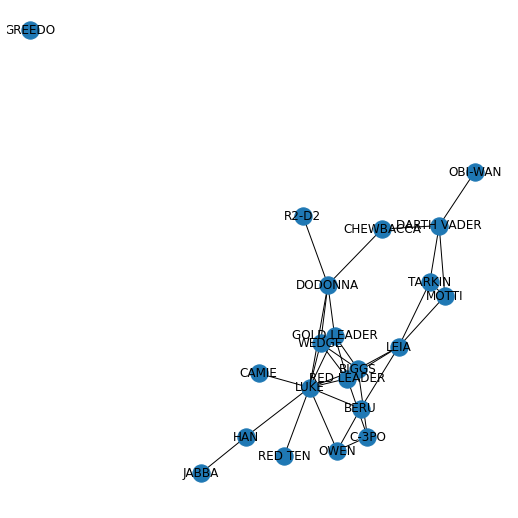

In [ ]:
figure(figsize=(7, 7))
nx.draw(G,with_labels = True)

### Set of removable edges obtained by applying normal method using edge betweenness centrality

In [ ]:

k1 = 25
b=nx.edge_betweenness_centrality(GBet)
sorted_b = dict( sorted(b.items(), key=operator.itemgetter(1),reverse=True))
sorted_b = dict(itertools.islice(sorted_b.items(), k1))
for edge in sorted_b.keys():
    GBet.remove_edge(edge[0],edge[1])

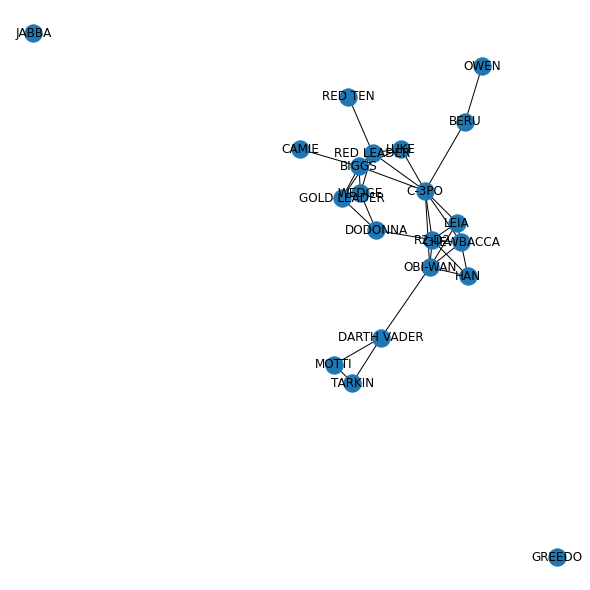

In [ ]:
figure(figsize=(8, 8))
nx.draw(GBet,with_labels = True)

In [ ]:
removable_edges_exact = []
for key in sorted_b.keys():
  removable_edges_exact.append(key)

In [ ]:
# The percentage of edges that are correctly obtained using the proposed algorithm
common_list = (list(set(removable_edges_exact) & set(removable_edges)))
print(common_list)

[('HAN', 'GREEDO'), ('LUKE', 'OBI-WAN'), ('C-3PO', 'HAN'), ('LEIA', 'HAN'), ('LUKE', 'LEIA'), ('LUKE', 'CHEWBACCA')]


In [ ]:
for i in sorted_b.items():
  print(i)

(('LUKE', 'HAN'), 0.09761904761904763)
(('HAN', 'GREEDO'), 0.09523809523809525)
(('HAN', 'JABBA'), 0.09523809523809525)
(('LEIA', 'MOTTI'), 0.07976190476190477)
(('LEIA', 'TARKIN'), 0.07976190476190477)
(('LUKE', 'CAMIE'), 0.07261904761904762)
(('LUKE', 'RED TEN'), 0.07261904761904762)
(('LEIA', 'HAN'), 0.06190476190476193)
(('LUKE', 'OWEN'), 0.05442176870748299)
(('LUKE', 'LEIA'), 0.05306122448979592)
(('LUKE', 'GOLD LEADER'), 0.051587301587301584)
(('LUKE', 'WEDGE'), 0.051587301587301584)
(('LEIA', 'BIGGS'), 0.04960317460317461)
(('LEIA', 'RED LEADER'), 0.049603174603174593)
(('LUKE', 'BERU'), 0.04126984126984127)
(('LEIA', 'DARTH VADER'), 0.040136054421768715)
(('LUKE', 'DODONNA'), 0.03888888888888889)
(('LUKE', 'OBI-WAN'), 0.03877551020408163)
(('LEIA', 'BERU'), 0.03718820861678006)
(('C-3PO', 'HAN'), 0.03571428571428572)
(('CHEWBACCA', 'DARTH VADER'), 0.033106575963718826)
(('LUKE', 'CHEWBACCA'), 0.032426303854875285)
(('C-3PO', 'OWEN'), 0.030612244897959186)
(('CHEWBACCA', 'DODON

In [ ]:
for edge in removable_edges:
  print(edge)

('C-3PO', 'BERU')
('RED LEADER', 'RED TEN')
('BIGGS', 'CAMIE')
('DARTH VADER', 'LEIA')
('HAN', 'GREEDO')
('C-3PO', 'R2-D2')
('C-3PO', 'CHEWBACCA')
('C-3PO', 'LUKE')
('C-3PO', 'LEIA')
('C-3PO', 'OBI-WAN')
('C-3PO', 'HAN')
('LUKE', 'R2-D2')
('LUKE', 'CHEWBACCA')
('LUKE', 'LEIA')
('LUKE', 'OBI-WAN')
('LEIA', 'R2-D2')
('LEIA', 'CHEWBACCA')
('LEIA', 'OBI-WAN')
('LEIA', 'HAN')
('HAN', 'R2-D2')
('HAN', 'CHEWBACCA')
('HAN', 'OBI-WAN')
('R2-D2', 'OBI-WAN')
('R2-D2', 'CHEWBACCA')
('OBI-WAN', 'CHEWBACCA')


In [ ]:
from numpy.linalg import matrix_rank,eig

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
def Connectivity(graph):
  A = nx.adjacency_matrix(graph)
  r = matrix_rank(A.todense())
  vals,v = eig(A.todense())
  # vals = nx.adjacency_spectrum(graph)
  sorted(vals,reverse = True)
  vals = vals[:r]
  # Using natural connectivity as the connectivity measure
  sum = 0
  for val in vals:
    sum += math.exp(val)
  nc = sum/len(vals)
  return nc

In [ ]:
print(Connectivity(G_orig))

110.56696786664698


In [ ]:
print(Connectivity(G))

11.351935348132201


In [ ]:
print(Connectivity(GBet))

11.092517665861013


### Jaccard's similarity of graphs

In [ ]:
adj_list_g = {}
for node in G.nodes:
  adj_list_g[node] = []
  for n in G.neighbors(node):
    adj_list_g[node].append(n)

In [ ]:
adj_list_gbet = {}
for node in GBet.nodes:
  adj_list_gbet[node] = []
  for n in GBet.neighbors(node):
    adj_list_gbet[node].append(n)

In [ ]:
def j_similarity(i,j):
 adj1 = adj_list_g[i]
 adj2 = adj_list_g[j]
 sim_val = len(set(adj1) & set(adj2))/len(set(adj1) | set(adj2))
 return sim_val

In [ ]:
def jb_similarity(i,j):
 adj1 = adj_list_gbet[i]
 adj2 = adj_list_gbet[j]
 sim_val = len(set(adj1) & set(adj2))/len(set(adj1) | set(adj2))
 return sim_val

In [ ]:
sim_g = 0
sim_gbet = 0
for edge in G.edges():
  temp = j_similarity(edge[0],edge[1])
  sim_g += temp

for edge in GBet.edges():
  temp = jb_similarity(edge[0],edge[1])
  sim_gbet += temp

print('For graph obtained through proposed algorithm',sim_g)
print('For graph obtained by normal method',sim_gbet)

For graph obtained through proposed algorithm 6.65932400932401
For graph obtained by normal method 9.477200577200577
